<a href="https://colab.research.google.com/github/xian-cong/Final-Year-Project-Nottingham/blob/main/ECG_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Recognition Classification
Using 16-bit ECG pre-processed data, TensorFlow RNN is used to make predictions.
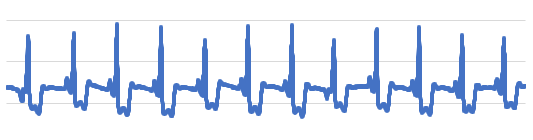

Prediction classes:
- 1 - baseline
- 2 - stress
- 3 - amusement
- 4 - meditation

In [ ]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output.csv')]

In [ ]:
dfs

[        data1    data2    data3    data4    data5    data6    data7    data8  \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
         data9   data10  .

In [ ]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [ ]:
dfs

[         0        1        2        3        4        5        6        7     \
 0     33444.0  33503.0  33489.0  33463.0  33431.0  33431.0  33481.0  33414.0   
 1     34372.0  34295.0  34197.0  34159.0  34163.0  34261.0  34374.0  34481.0   
 2     32167.0  32172.0  32189.0  32197.0  32215.0  32172.0  32087.0  32031.0   
 3     36117.0  36161.0  36021.0  35783.0  35621.0  35547.0  35532.0  35399.0   
 4     33671.0  33679.0  33719.0  33756.0  33777.0  33767.0  33745.0  33708.0   
 ...       ...      ...      ...      ...      ...      ...      ...      ...   
 4141  32021.0  31987.0  31987.0  31975.0  32001.0  32025.0  32053.0  32068.0   
 4142  30696.0  30741.0  30801.0  30813.0  30799.0  30828.0  30879.0  30927.0   
 4143  32491.0  32379.0  32260.0  32123.0  32029.0  32019.0  32031.0  32055.0   
 4144  32501.0  32316.0  32141.0  31981.0  31796.0  31603.0  31426.0  31265.0   
 4145  36239.0  36049.0  35795.0  35580.0  35428.0  35263.0  35109.0  34957.0   
 
          8        9     .

Row 0 - 6999 are data while Row 7000 is label

In [ ]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({7000: 'Label'}, axis=1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31091.0,31103.0,31104.0,31132.0,31180.0,31194.0,31173.0,31151.0,31130.0,31171.0,...,30861.0,30807.0,30807.0,30820.0,30765.0,30793.0,30788.0,30787.0,30865.0,1.0
1,32692.0,32733.0,32901.0,33053.0,33079.0,33091.0,33135.0,33137.0,33112.0,33071.0,...,32839.0,32867.0,32979.0,33090.0,33092.0,33157.0,33233.0,33189.0,33247.0,3.0
2,35431.0,34977.0,34721.0,34495.0,34699.0,35300.0,35713.0,35839.0,35933.0,35943.0,...,34378.0,34287.0,34215.0,34195.0,34229.0,34271.0,34301.0,34364.0,34407.0,1.0
3,32661.0,32710.0,32667.0,32589.0,32589.0,32606.0,32467.0,32161.0,31919.0,31891.0,...,32500.0,32493.0,32499.0,32511.0,32541.0,32529.0,32463.0,32437.0,32433.0,1.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,30844.0,30831.0,30631.0,30325.0,30088.0,29922.0,29847.0,29782.0,29617.0,29297.0,...,31254.0,31425.0,31507.0,31441.0,31423.0,31367.0,31309.0,31335.0,31407.0,3.0
4142,32287.0,32253.0,32225.0,32211.0,32157.0,32183.0,32259.0,32359.0,32415.0,32451.0,...,31784.0,31752.0,31723.0,31684.0,31684.0,31741.0,31811.0,31831.0,31825.0,1.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0,1.0
4144,34434.0,34545.0,34721.0,34969.0,35188.0,35141.0,35051.0,35063.0,35117.0,35132.0,...,29727.0,29739.0,29754.0,29781.0,29911.0,29959.0,29954.0,29760.0,29620.0,2.0


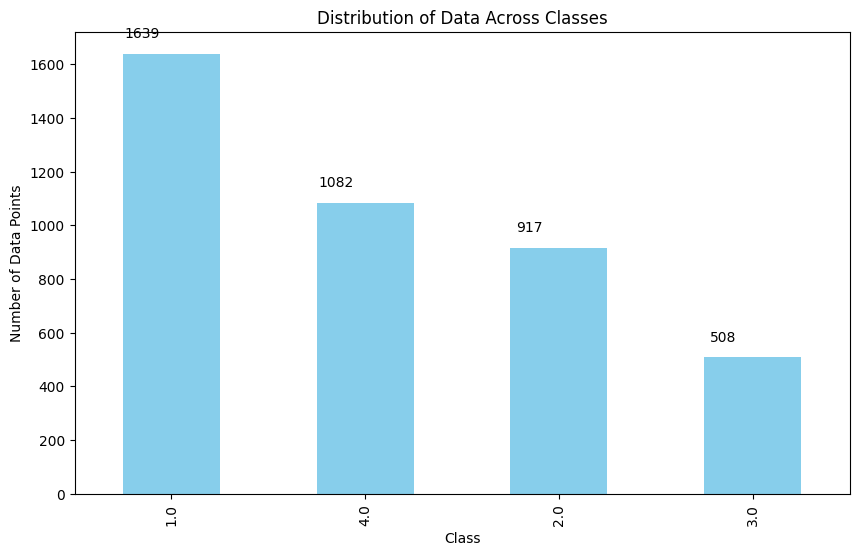

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


## Preprocessing

Can perform data scaling here.

In [ ]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

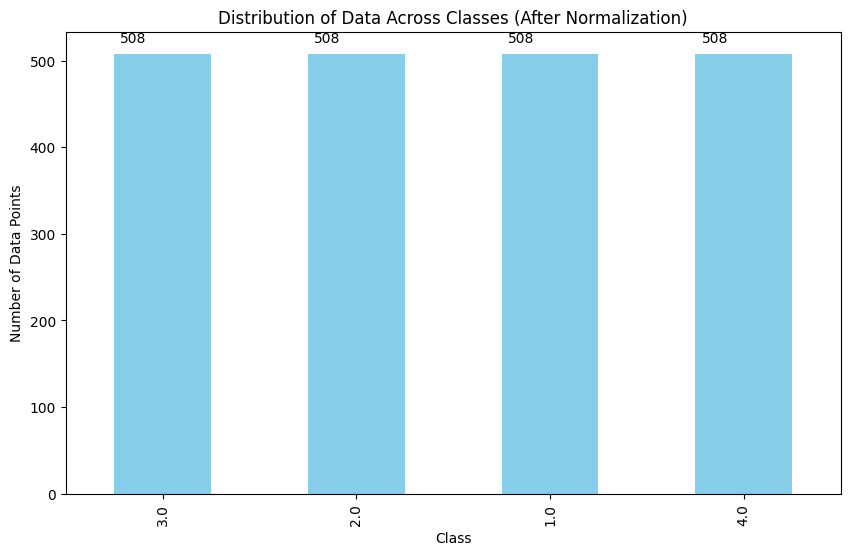

In [ ]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [ ]:
# if want use normalised data for training, use this

# y = normalized_data['Label'].copy()
# X = normalized_data.drop('Label', axis = 1).copy()

In [ ]:
# if want use original data for training, use this

y = data['Label'].copy()
X = data.drop('Label', axis = 1).copy()

In [ ]:
# label column
y

0       1.0
1       3.0
2       1.0
3       1.0
4       3.0
       ... 
4141    3.0
4142    1.0
4143    1.0
4144    2.0
4145    3.0
Name: Label, Length: 4146, dtype: float64

In [ ]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,31091.0,31103.0,31104.0,31132.0,31180.0,31194.0,31173.0,31151.0,31130.0,31171.0,...,30981.0,30861.0,30807.0,30807.0,30820.0,30765.0,30793.0,30788.0,30787.0,30865.0
1,32692.0,32733.0,32901.0,33053.0,33079.0,33091.0,33135.0,33137.0,33112.0,33071.0,...,32884.0,32839.0,32867.0,32979.0,33090.0,33092.0,33157.0,33233.0,33189.0,33247.0
2,35431.0,34977.0,34721.0,34495.0,34699.0,35300.0,35713.0,35839.0,35933.0,35943.0,...,34383.0,34378.0,34287.0,34215.0,34195.0,34229.0,34271.0,34301.0,34364.0,34407.0
3,32661.0,32710.0,32667.0,32589.0,32589.0,32606.0,32467.0,32161.0,31919.0,31891.0,...,32508.0,32500.0,32493.0,32499.0,32511.0,32541.0,32529.0,32463.0,32437.0,32433.0
4,32611.0,32565.0,32567.0,32647.0,32754.0,32836.0,32867.0,32925.0,33069.0,33343.0,...,29082.0,29133.0,29193.0,29237.0,29311.0,29449.0,29501.0,29441.0,29353.0,29162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141,30844.0,30831.0,30631.0,30325.0,30088.0,29922.0,29847.0,29782.0,29617.0,29297.0,...,31173.0,31254.0,31425.0,31507.0,31441.0,31423.0,31367.0,31309.0,31335.0,31407.0
4142,32287.0,32253.0,32225.0,32211.0,32157.0,32183.0,32259.0,32359.0,32415.0,32451.0,...,31762.0,31784.0,31752.0,31723.0,31684.0,31684.0,31741.0,31811.0,31831.0,31825.0
4143,31631.0,31565.0,31563.0,31580.0,31641.0,31697.0,31729.0,31729.0,31686.0,31636.0,...,35412.0,35279.0,35148.0,35069.0,35119.0,35265.0,35439.0,35557.0,35589.0,35571.0
4144,34434.0,34545.0,34721.0,34969.0,35188.0,35141.0,35051.0,35063.0,35117.0,35132.0,...,29702.0,29727.0,29739.0,29754.0,29781.0,29911.0,29959.0,29954.0,29760.0,29620.0


### Split into train and test sets

In [ ]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
1145,32648.0,32593.0,32575.0,32591.0,32581.0,32537.0,32473.0,32485.0,32509.0,32532.0,...,29381.0,29378.0,29445.0,29530.0,29564.0,29599.0,29657.0,29687.0,29717.0,29755.0
1100,35463.0,35839.0,36217.0,36507.0,36713.0,36679.0,36705.0,36694.0,36455.0,36340.0,...,26199.0,26165.0,26058.0,26113.0,26199.0,26312.0,26304.0,26069.0,26034.0,26085.0
3479,34828.0,34644.0,34478.0,34416.0,34316.0,34105.0,33941.0,33861.0,33777.0,33581.0,...,28026.0,28015.0,28196.0,28420.0,28389.0,28249.0,28133.0,28083.0,28065.0,28122.0
917,29353.0,29261.0,29364.0,29462.0,29510.0,29559.0,29757.0,29787.0,29903.0,29985.0,...,32924.0,33031.0,33193.0,33417.0,33585.0,33631.0,33545.0,33479.0,33479.0,33529.0
1805,32701.0,32742.0,32805.0,32869.0,32931.0,32989.0,33037.0,33009.0,33087.0,33197.0,...,31348.0,31334.0,31340.0,31330.0,31326.0,31335.0,31325.0,31305.0,31311.0,31325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,32456.0,32479.0,32504.0,32505.0,32457.0,32390.0,32351.0,32324.0,32247.0,32165.0,...,32564.0,32687.0,32725.0,32725.0,32749.0,32741.0,32715.0,32701.0,32673.0,32689.0
2763,32703.0,32861.0,33045.0,33089.0,33015.0,32982.0,32937.0,32900.0,32833.0,32714.0,...,33157.0,33116.0,32903.0,32700.0,32555.0,32451.0,32383.0,32405.0,32567.0,32773.0
905,19259.0,17171.0,15669.0,14904.0,14834.0,15344.0,16101.0,16967.0,17865.0,18866.0,...,20469.0,21414.0,22134.0,22651.0,22982.0,23382.0,23880.0,24387.0,24917.0,25505.0
3980,22466.0,22580.0,22799.0,23101.0,23545.0,24268.0,25143.0,25887.0,26501.0,27063.0,...,33199.0,32863.0,32598.0,32523.0,32471.0,32135.0,32087.0,31973.0,31755.0,31717.0


In [ ]:
# 70% of labels
y_train

1145    4.0
1100    2.0
3479    2.0
917     2.0
1805    4.0
       ... 
2895    1.0
2763    4.0
905     4.0
3980    3.0
235     4.0
Name: Label, Length: 2902, dtype: float64

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

model = Sequential()

y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# Input layer
model.add(Dense(256, input_shape=(X_train.shape[1],)))

# FC Layer - 128 nodes
model.add(Dense(128))

# Batch Normalisation - 128 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 128 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 128 nodes
model.add(LeakyReLU(0.2))

# model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(64))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(32))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(16))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.5))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(4, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               1792256   
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                      

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

# # Assuming y_train contains class labels starting from 1
# # Subtract 1 to bring them into the range [0, num_classes-1]
# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model = Sequential()

# # Input layer
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# # Hidden layers
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# # Output layer with 4 classes and softmax activation for multi-class classification
# model.add(Dense(4, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Train the model
# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 454436 (1.73 MB)
Trainable params: 454436 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
73/73 [==============================] - 2s 15ms/step - loss: 35071.6875 - accuracy: 0.2779 - val_loss: 2562.0054 - val_accuracy: 0.3580
Epo

## RNN Training

In [ ]:
# # for GRU in RNN
# tf.expand_dims(X_train, axis=2).shape

TensorShape([2902, 7000, 1])

In [ ]:
# ## RNN (evaluate as a time series)
# # inputs = tf.keras.Input(shape=(X_train.shape[1],))

# # expand = tf.expand_dims(inputs, axis=2)
# # gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
# # flatten = tf.keras.layers.Flatten()(gru)

# # outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

# # model = tf.keras.Model(inputs=inputs, outputs=outputs)

# # print(model.summary())

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, GRU, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU

# inputs = Input(shape=(X_train.shape[1],))

# # Expand dimensions for GRU input
# expand = tf.expand_dims(inputs, axis=2)

# # GRU layers
# gru1 = GRU(256, return_sequences=True)(expand)
# gru2 = GRU(128, return_sequences=True)(gru1)

# # Flatten the output
# flatten = Flatten()(gru2)

# # Dense layers
# dense1 = Dense(128)(flatten)
# batch_norm1 = BatchNormalization()(dense1)
# dropout1 = Dropout(0.5)(batch_norm1)
# leaky_relu1 = LeakyReLU(0.2)(dropout1)

# dense2 = Dense(64)(leaky_relu1)
# batch_norm2 = BatchNormalization()(dense2)
# dropout2 = Dropout(0.5)(batch_norm2)
# leaky_relu2 = LeakyReLU(0.2)(dropout2)

# dense3 = Dense(16)(leaky_relu2)
# batch_norm3 = BatchNormalization()(dense3)
# dropout3 = Dropout(0.5)(batch_norm3)
# leaky_relu3 = LeakyReLU(0.2)(dropout3)

# # Output layer with softmax activation
# outputs = Dense(4, activation='softmax')(leaky_relu3)

# # Create the model
# model = Model(inputs=inputs, outputs=outputs)

# # Print the model summary
# model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7000)]            0         
                                                                 
 tf.expand_dims_2 (TFOpLamb  (None, 7000, 1)           0         
 da)                                                             
                                                                 
 gru_2 (GRU)                 (None, 7000, 256)         198912    
                                                                 
 gru_3 (GRU)                 (None, 7000, 128)         148224    
                                                                 
 flatten_2 (Flatten)         (None, 896000)            0         
                                                                 
 dense_29 (Dense)            (None, 128)               114688128 
                                                           

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train_adjusted = y_train - 1

# # Convert adjusted labels to one-hot encoded format
# y_train_one_hot = to_categorical(y_train_adjusted, num_classes=4)

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     X_train,
#     y_train_one_hot,
#     epochs=100,
#     batch_size=32,
#     validation_split=0.2
# )

Epoch 1/100
73/73 [==============================] - 48s 579ms/step - loss: 0.7487 - accuracy: 0.2576 - val_loss: 460.9283 - val_accuracy: 0.3666
Epoch 2/100
73/73 [==============================] - 41s 561ms/step - loss: 0.6864 - accuracy: 0.2663 - val_loss: 1731.6613 - val_accuracy: 0.2048
Epoch 3/100
73/73 [==============================] - 42s 582ms/step - loss: 0.6401 - accuracy: 0.2921 - val_loss: 2689.4170 - val_accuracy: 0.2048
Epoch 4/100
73/73 [==============================] - 42s 581ms/step - loss: 0.6181 - accuracy: 0.3012 - val_loss: 3069.4219 - val_accuracy: 0.2048
Epoch 5/100
73/73 [==============================] - 43s 585ms/step - loss: 0.5945 - accuracy: 0.3279 - val_loss: 468.3293 - val_accuracy: 0.3666
Epoch 6/100
73/73 [==============================] - 42s 580ms/step - loss: 0.5932 - accuracy: 0.3274 - val_loss: 760.6590 - val_accuracy: 0.3666
Epoch 7/100
73/73 [==============================] - 42s 582ms/step - loss: 0.5757 - accuracy: 0.3498 - val_loss: 441.777

KeyboardInterrupt: 

## Result Graph


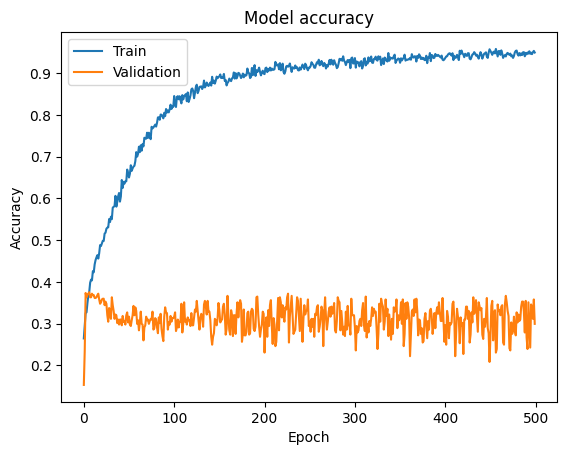

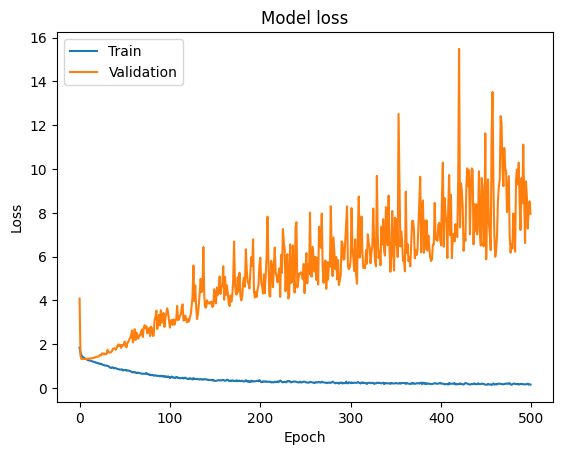

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction

In [ ]:
test_dfs = [pd.read_csv('/content/drive/MyDrive/output_S17(use for test).csv')]

In [ ]:
for test_df in test_dfs:
  test_df.columns = list(range(len(test_df.columns)))

In [ ]:
test_dfs = pd.DataFrame(test_dfs[0])  # Assuming your data is stored in the first dimension

In [ ]:
test_data = test_dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
test_data = test_data.rename({5000: 'Label'}, axis=1)

In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,Label
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0,3.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0,2.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0,1.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0,4.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0,2.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0,2.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0,1.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0,2.0


In [ ]:
test_y = test_data['Label'].copy()
test_X = test_data.drop('Label', axis = 1).copy()

In [ ]:
test_y

0      3.0
1      2.0
2      1.0
3      4.0
4      2.0
      ... 
292    2.0
293    2.0
294    1.0
295    2.0
296    1.0
Name: Label, Length: 297, dtype: float64

In [ ]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999
0,31773.0,31757.0,31732.0,31700.0,31734.0,31813.0,31853.0,31873.0,31858.0,31841.0,...,31679.0,31577.0,31452.0,31568.0,31748.0,31869.0,31909.0,31881.0,31963.0,32005.0
1,37245.0,37193.0,37111.0,37223.0,37500.0,37732.0,37827.0,37958.0,38098.0,38313.0,...,27736.0,24801.0,23061.0,22173.0,22009.0,22184.0,22611.0,23235.0,23813.0,24237.0
2,35245.0,35260.0,35077.0,34727.0,34495.0,34445.0,34676.0,34801.0,34595.0,34236.0,...,31655.0,31694.0,31711.0,31733.0,31754.0,31798.0,31821.0,31837.0,31869.0,31835.0
3,28355.0,28467.0,28579.0,28525.0,28514.0,28606.0,28597.0,28717.0,28855.0,28957.0,...,32249.0,32285.0,32417.0,32575.0,32687.0,32801.0,32807.0,32789.0,32910.0,33013.0
4,31431.0,31743.0,32033.0,32321.0,32513.0,32659.0,32916.0,33094.0,33369.0,33583.0,...,25187.0,25132.0,25223.0,25376.0,25547.0,25716.0,25785.0,25867.0,25930.0,25981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24190.0,22913.0,22477.0,22529.0,22662.0,22909.0,23435.0,24348.0,25400.0,26100.0,...,27497.0,27553.0,27519.0,27637.0,27744.0,27817.0,27911.0,27961.0,28004.0,27981.0
293,35516.0,35573.0,35528.0,35405.0,35258.0,35324.0,35505.0,35711.0,35869.0,35923.0,...,26764.0,26867.0,26775.0,26743.0,26795.0,26857.0,26855.0,26834.0,26863.0,26848.0
294,32892.0,32939.0,32976.0,33012.0,33004.0,33001.0,33013.0,32987.0,32973.0,32990.0,...,31855.0,31812.0,31671.0,31416.0,31119.0,30717.0,30267.0,29731.0,29230.0,28879.0
295,27983.0,27951.0,27917.0,27895.0,27915.0,27940.0,28001.0,28034.0,28012.0,28037.0,...,28919.0,28983.0,28900.0,28964.0,28993.0,29093.0,29207.0,29287.0,29305.0,29380.0


In [ ]:
predictions = model.predict(test_X)

# Iterate through each row and print the predictions
for i in range(len(predictions)):
    print(f"Row {i+1} Predictions: {predictions[i]}")

10/10 [==============================] - 0s 5ms/step
Row 1 Predictions: [1. 1. 0. 0.]
Row 2 Predictions: [1. 1. 0. 0.]
Row 3 Predictions: [1. 1. 0. 0.]
Row 4 Predictions: [1. 1. 0. 0.]
Row 5 Predictions: [1. 1. 0. 0.]
Row 6 Predictions: [1. 1. 0. 0.]
Row 7 Predictions: [1. 1. 0. 0.]
Row 8 Predictions: [1. 1. 0. 0.]
Row 9 Predictions: [1. 1. 0. 0.]
Row 10 Predictions: [1. 1. 0. 0.]
Row 11 Predictions: [1. 1. 0. 0.]
Row 12 Predictions: [1. 1. 0. 0.]
Row 13 Predictions: [1. 1. 0. 0.]
Row 14 Predictions: [1. 1. 0. 0.]
Row 15 Predictions: [1. 1. 0. 0.]
Row 16 Predictions: [1. 1. 0. 0.]
Row 17 Predictions: [1. 1. 0. 0.]
Row 18 Predictions: [1. 1. 0. 0.]
Row 19 Predictions: [1. 1. 0. 0.]
Row 20 Predictions: [1. 1. 0. 0.]
Row 21 Predictions: [1. 1. 0. 0.]
Row 22 Predictions: [1. 1. 0. 0.]
Row 23 Predictions: [1. 1. 0. 0.]
Row 24 Predictions: [1. 1. 0. 0.]
Row 25 Predictions: [1. 1. 0. 0.]
Row 26 Predictions: [1. 1. 0. 0.]
Row 27 Predictions: [1. 1. 0. 0.]
Row 28 Predictions: [1. 1. 0. 0.]
Row 

## Resuts

In [ ]:
from tensorflow.keras.utils import to_categorical

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=4)

results = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1]*100))

Test Accuracy: 32.64%


34.89%

## Save model

In [ ]:
model.save('/content/drive/MyDrive/ecg_emotion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model.tflite', 'wb').write(tflite_model)

1842816

In [ ]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [ ]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model'

In [ ]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

# 2 Class Classification

In [1]:
# work with data
import numpy as np
import pandas as pd

# get train and test sets
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# create dataframe and import pre-processed dataset
dfs = [pd.read_csv('/content/drive/MyDrive/final_output_2class_1500in.csv')]

In [4]:
dfs

[       data1  data2  data3  data4  data5  data6  data7  data8  data9  data10  \
 0      33444  33503  33489  33463  33431  33431  33481  33414  33339   33372   
 1      31478  31533  31615  31695  31769  31847  31901  31897  31907   31949   
 2      33837  33919  34007  34167  34337  34407  34414  34357  34265   34283   
 3      31778  31805  31821  31741  31585  31474  31492  31535  31700   32138   
 4      29537  29540  29649  29764  29821  29876  29944  29948  30036   29979   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
 12844  29257  29343  29453  29633  29708  29781  29846  29953  29973   29975   
 12845  35023  35103  35207  35233  35276  35253  35332  35407  35457   35442   
 12846  30584  30559  30533  30551  30652  30650  30741  30783  30645   30567   
 12847  28487  28677  28737  28766  28859  28833  28885  28881  28946   29196   
 12848  30903  30949  30925  30933  30899  30916  31063  31087  30948   30897   
 
        ...  data1492  dat

In [5]:
# rename each headings to integer number
for df in dfs:
  df.columns = list(range(len(df.columns)))

In [6]:
dfs

[        0      1      2      3      4      5      6      7      8      9     \
 0      33444  33503  33489  33463  33431  33431  33481  33414  33339  33372   
 1      31478  31533  31615  31695  31769  31847  31901  31897  31907  31949   
 2      33837  33919  34007  34167  34337  34407  34414  34357  34265  34283   
 3      31778  31805  31821  31741  31585  31474  31492  31535  31700  32138   
 4      29537  29540  29649  29764  29821  29876  29944  29948  30036  29979   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 12844  29257  29343  29453  29633  29708  29781  29846  29953  29973  29975   
 12845  35023  35103  35207  35233  35276  35253  35332  35407  35457  35442   
 12846  30584  30559  30533  30551  30652  30650  30741  30783  30645  30567   
 12847  28487  28677  28737  28766  28859  28833  28885  28881  28946  29196   
 12848  30903  30949  30925  30933  30899  30916  31063  31087  30948  30897   
 
        ...   1491   1492   1493   149

In [7]:
dfs = pd.DataFrame(dfs[0])  # Assuming your data is stored in the first dimension

In [8]:
# shuffle data and reset index to start from 0
data = dfs.sample(frac = 1.0, random_state = 1).reset_index(drop=True)
# rename col 7000 as Label
data = data.rename({1500: 'Label'}, axis=1)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,Label
0,33219,33238,33273,33239,33202,33171,33151,33161,33159,33103,...,33479,33556,33677,33791,33885,33873,33829,33799,33781,1
1,32044,32151,32268,32373,32404,32396,32381,32401,32469,32515,...,30300,30324,30316,30330,30372,30412,30453,30487,30492,1
2,32820,32773,32799,32788,32746,32736,32771,32841,32839,32799,...,37090,36996,36879,36791,36708,36596,36429,36213,36005,2
3,33915,33772,33627,33496,33348,33147,32930,32724,32552,32439,...,34317,34135,33993,33947,33947,33921,33911,33869,33751,1
4,32247,32239,32233,32259,32267,32283,32359,32395,32399,32447,...,33022,33068,33181,33297,33429,33535,33661,33782,33911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12844,39057,39187,39283,39336,39377,39399,39418,39487,39561,39557,...,39023,38964,38884,38809,38743,38773,38767,38762,38804,2
12845,28444,28517,28607,28689,28753,28791,28873,28975,29052,29081,...,30381,29998,29627,29268,28919,28610,28311,28037,27824,1
12846,31908,31950,31903,31887,31906,31842,31869,31900,31917,31905,...,33189,33201,33175,33121,33065,32958,32783,32525,32129,1
12847,29359,29342,29379,29383,29397,29399,29403,29383,29353,29372,...,31889,31919,31956,31969,31972,31969,31983,32001,32027,1


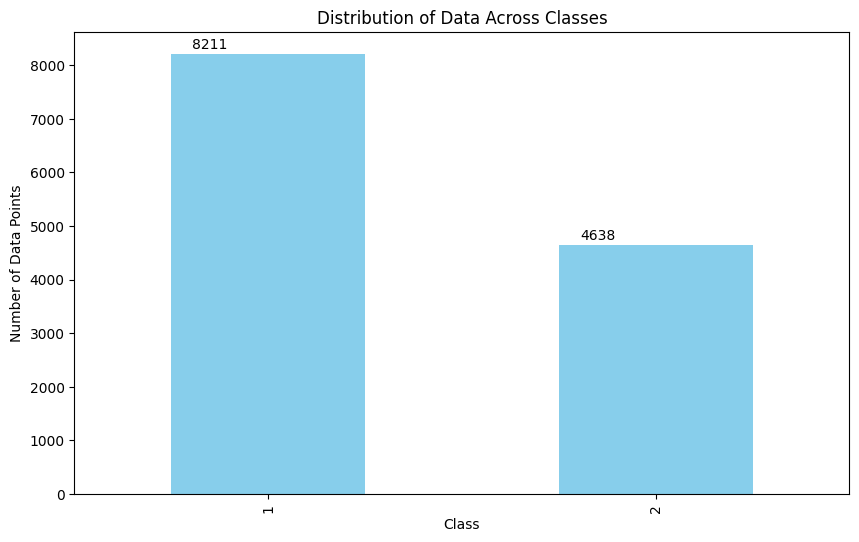

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the labels column
labels = data['Label']

# Counting the occurrences of each class
class_counts = labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


In [11]:
labels = data['Label']

# Specifying the target number of data points for each class (minimum class size)
target_size = min(labels.value_counts())

# Function to normalize each class
def normalize_class(class_label):
    class_data = data[data['Label'] == class_label]
    normalized_data = class_data.sample(target_size, replace=True, random_state=42)
    return normalized_data

# Applying the normalization function to each class
normalized_data = pd.concat([normalize_class(class_label) for class_label in labels.unique()])

# Shuffle the normalized data
normalized_data = normalized_data.sample(frac=1, random_state=42)

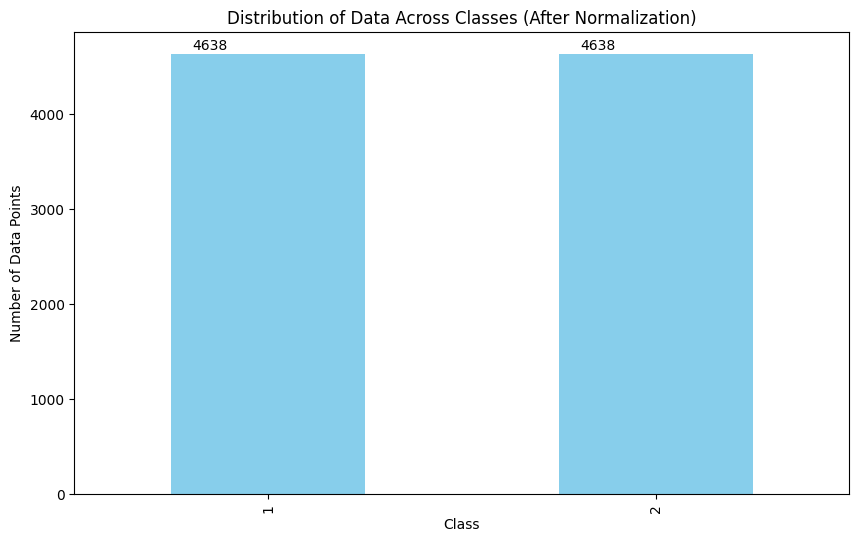

In [12]:
normalized_labels = normalized_data['Label']

# Counting the occurrences of each class in the normalized data
normalized_class_counts = normalized_labels.value_counts()

# Plotting the bar plot with count values on top
plt.figure(figsize=(10, 6))
bars = normalized_class_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar, count in zip(bars.patches, normalized_class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.title('Distribution of Data Across Classes (After Normalization)')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()

In [13]:
# if want use normalised data for training, use this

y = normalized_data['Label'].copy()
X = normalized_data.drop('Label', axis = 1).copy()

In [14]:
# label column
y

11152    1
11958    2
12205    2
2609     2
4825     1
        ..
403      2
10221    2
11527    2
9464     1
8454     2
Name: Label, Length: 9276, dtype: int64

In [15]:
# one less column (left with raw data without label)
X

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
11152,37153,40071,43105,45840,47757,48719,48251,45836,42709,39233,...,33875,33899,33933,33991,33994,33957,33919,33945,33991,34021
11958,32471,31871,31425,31333,31409,31548,31820,32077,32249,32415,...,37249,37085,36934,36737,36487,36231,35991,35957,36113,36183
12205,32927,32845,32783,32624,32365,32216,32357,32583,32929,33340,...,32844,33643,34760,35837,36558,36855,36771,36438,36075,35473
2609,65109,64954,64813,64661,64517,64372,64229,62723,56271,50500,...,34342,31349,29116,27693,26561,25439,24682,24442,24679,25071
4825,32274,32301,32353,32391,32395,32378,32329,32341,32348,32342,...,32268,32257,32173,32053,31793,31390,30939,30468,29951,29503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,31475,31799,32027,31952,31833,31854,31837,31744,31647,31397,...,32053,32037,31981,31911,31936,31921,31992,32023,31868,31836
10221,30317,30157,29794,29215,28631,27809,26971,26298,25395,24459,...,36349,35903,36059,36525,36479,36516,36627,36759,37127,37659
11527,24430,24465,24585,24661,24674,24665,24757,24818,24825,24879,...,33828,33657,33555,33549,33606,33573,33565,33598,33661,33663
9464,32087,32037,32031,32029,31997,31975,31993,31995,31994,32021,...,42571,42649,42751,42807,42865,42945,42991,42989,42979,42964


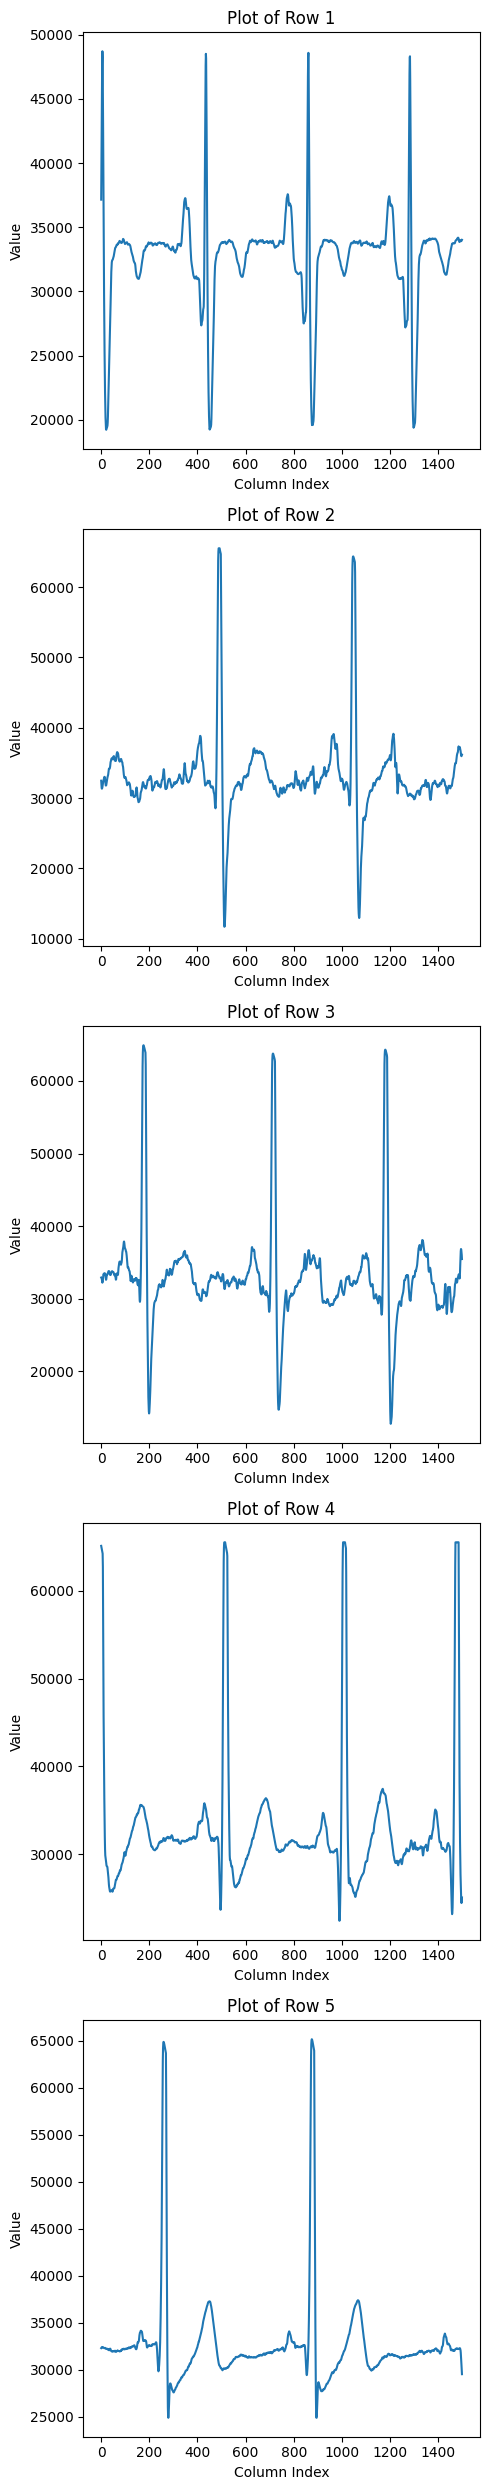

In [16]:
# Assuming dfs is your DataFrame
# Extracting the first three rows
rows_to_plot = X.iloc[:5, :]

# Get the number of rows and columns
num_rows, num_cols = rows_to_plot.shape

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(5, 5*num_rows))

# Plot each row in a separate subplot
for i in range(num_rows):
    axes[i].plot(rows_to_plot.iloc[i, :])
    axes[i].set_xlabel('Column Index')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Plot of Row {i+1}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
# train set = 70%, test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1)

In [18]:
# 70% of original 4146 rows
X_train

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
11162,34894,34917,34860,34853,34879,34940,34943,34850,34697,34541,...,32387,32399,32389,32413,32399,32389,32421,32495,32505,32481
5279,32990,32911,32893,32939,32929,32949,32965,32918,32730,32660,...,30731,30901,31034,31143,31293,31420,31503,31605,31761,31855
3641,27933,27913,28045,28151,28279,28343,28348,28358,28459,28644,...,33748,33701,33735,33870,33919,34163,34298,34271,34127,33994
639,36991,36941,36821,36805,36742,36717,36767,36871,37028,37063,...,31745,31811,31556,31337,31204,31095,30981,31003,31031,31013
9349,34135,34060,33997,33929,33811,33757,33855,34021,34145,34284,...,44629,43068,41593,40264,39205,38400,37989,37575,36962,35889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8717,26108,26205,26260,26321,26383,26423,26441,26525,26659,26776,...,31314,31308,31295,31333,31398,31463,31441,31373,31377,31397
2388,29455,29213,29066,28999,28909,28781,28661,28586,28453,28402,...,32881,32599,32324,32006,31665,31391,31221,31065,30899,30613
9225,33318,33253,33261,33239,33333,33484,33602,33717,33883,33893,...,34740,34942,35157,35261,35341,35397,35463,35561,35497,35154
12448,32268,32275,32221,32123,32071,32037,32012,31908,31803,31725,...,64231,64095,63623,57864,52667,47667,42089,36351,31160,26901


In [19]:
# 70% of labels
y_train

11162    1
5279     2
3641     2
639      2
9349     2
        ..
8717     1
2388     1
9225     2
12448    1
9312     2
Name: Label, Length: 7884, dtype: int64

## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.h5', save_weights_only=True, save_best_only=False, verbose=1)

model = Sequential()

# Adjust labels to be 0 or 1
y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=2)

# Input layer
model.add(Dense(32, input_shape=(X_train.shape[1],)))

# FC Layer - 128 nodes
model.add(Dense(16))

# model.add(Dense(16, kernel_regularizer=l2(0.01)))  # Add L2 regularization

# Batch Normalisation - 128 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 128 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 128 nodes
model.add(LeakyReLU(0.2))

# model.add(Dense(128, kernel_regularizer=l2(0.01)))

# FC Layer - 64 nodes
model.add(Dense(8))

# Batch Normalisation - 64 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 64 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 64 nodes
model.add(LeakyReLU(0.2))

# FC Layer - 16 nodes
model.add(Dense(4))

# Batch Normalisation - 16 nodes
model.add(BatchNormalization())

# Dropout 0.5 - 16 nodes
model.add(Dropout(0.2))

# Leaky RELU 0.2 - 16 nodes
model.add(LeakyReLU(0.2))

# FC layer + sigmoid, output - 4 classes
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                        

## CNN

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Convert X_train DataFrame to numpy array
X_train_array = X_train.to_numpy()

checkpoint = ModelCheckpoint(filepath='model_weights_epoch_{epoch:02d}.h5', save_weights_only=True, save_best_only=True, verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model = Sequential()

# Adjust labels to be 0 or 1
y_train_adjusted = y_train - 1

# Convert adjusted labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=2)

# Convolutional layers
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Fully connected layers
# model.add(Dense(32, kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(LeakyReLU(0.2))

model.add(Dense(16, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LeakyReLU(0.2))

model.add(Dense(8, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LeakyReLU(0.2))

model.add(Dense(4, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LeakyReLU(0.2))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.000008)  # Adjust the learning rate
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Reshape X_train to include a channel dimension
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train_one_hot,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1496, 32)          192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 748, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 746, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 373, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 23872)             0         
                                                                 
 dense (Dense)               (None, 16)                3

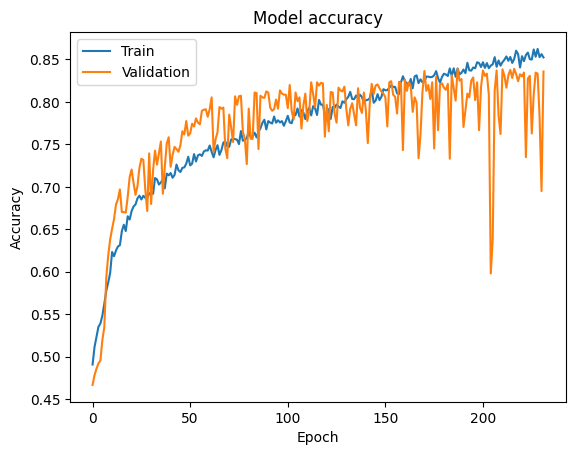

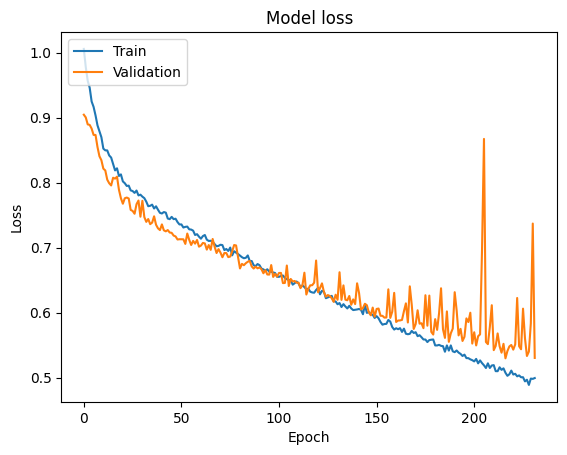

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
best_val_accuracy = history.history['val_accuracy'][best_epoch]

print("Best Validation Accuracy:", best_val_accuracy, "at epoch", best_epoch + 1)

# Evaluate the model at the best epoch
best_model = Sequential.from_config(model.get_config())  # Create a new model with the same architecture

# Load the weights of the model at the best epoch
best_model.load_weights(f"model_weights_epoch_{best_epoch + 1}.h5")

# Compile the best model
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adjust labels to be 0 or 1
y_test_adjusted = y_test - 1

# Convert adjusted labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=2)

# Evaluate the best model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy of the Best Model:", test_accuracy)


Best Validation Accuracy: 0.8389346599578857 at epoch 188
44/44 [==============================] - 1s 18ms/step - loss: 0.5431 - accuracy: 0.8348
Test Accuracy of the Best Model: 0.834770143032074


Best Validation Accuracy: 0.7951807379722595 at epoch 17
44/44 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.7981
Test Accuracy of the Best Model: 0.7981321811676025

In [23]:
best_model.save('/content/drive/MyDrive/ecg_emotion_model_2class_1500in.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# convert to TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open('/content/drive/MyDrive/ecg_emotion_model_2class_1500in.tflite', 'wb').write(tflite_model)

397752

In [25]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
  c_str = ''
  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  c_str += 'const unsigned char ' + var_name + '[] = {'

  hex_array = []

  for i, val in enumerate(hex_data) :
    hex_str = format(val,'#04x')
    if(i+1) < len(hex_data):
      hex_str += ','
    if(i+1) %12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

  c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'

  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [26]:
c_model_name = '/content/drive/MyDrive/ecg_emotion_model_2class_1500in'

In [27]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))